# Author: ABSAR AHMED
# Task#2

# Object
From the given ‘Iris’ dataset, predict the optimum number of clustersand represent it visually.
Use Python or perform this task.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\The Spark Foundation Dataset Csv\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [10]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Droping Columns

In [13]:
df.drop(['SepalLengthCm', 'SepalWidthCm', 'Species'],axis='columns',inplace=True)

In [16]:
df.head()

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2


# K- Means Clustering

In [17]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
df['cluster'] = yp
df.head()

,Id,PetalLengthCm,PetalWidthCm,cluster
0,1,1.4,0.2,2
1,2,1.4,0.2,2
2,3,1.3,0.2,2
3,4,1.5,0.2,2
4,5,1.4,0.2,2


In [20]:
df.cluster.unique()

array([2, 0, 1])

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

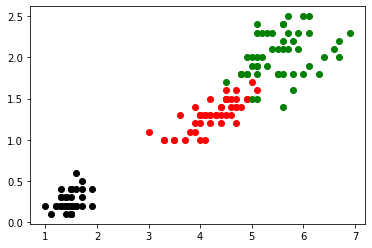

In [23]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='red')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='black')

# Elbow Potting

In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

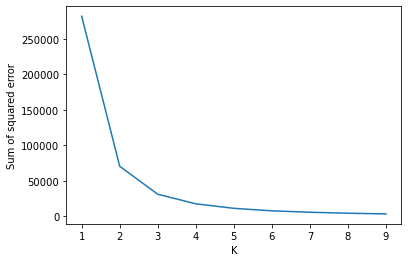

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [26]:
## The optimum number of clusters is 2.